# 1. Підключення бібліотек та ознайомлення з даними

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import random

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
%matplotlib inline

In [2]:
df = pd.read_csv('bank-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Відмітимо велику кількість текстових типів даних, які потрібно буде перетворити в числовий тип, і відсутність пропущених значень.

# 2. Візуалізація даних

Перевіримо, чи впливає сфера діяльності на співвідношення в наявносі/відсутності депозитів

<AxesSubplot:xlabel='job', ylabel='count'>

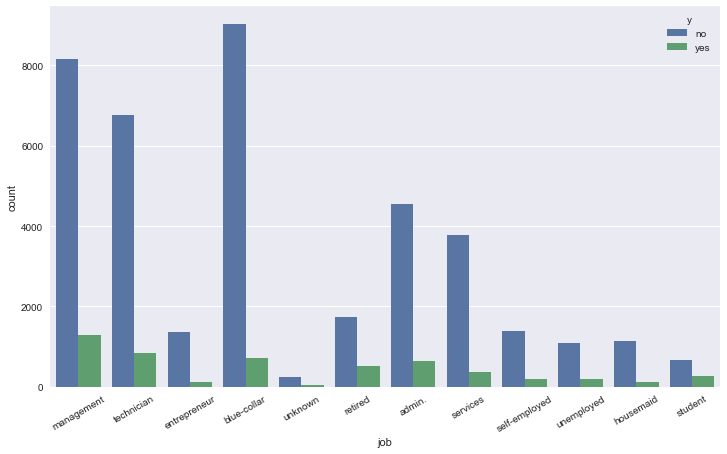

In [6]:
fig = plt.subplots(figsize = (12, 7))
plt.xticks(rotation = '30')
sns.countplot(x = 'job',  hue = 'y', data = df)

Варто відмітити велику частку наявності депозитів серед студентів

Перевіримо збалансованість вибірки

<AxesSubplot:xlabel='y', ylabel='count'>

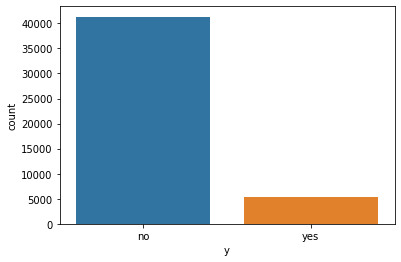

In [26]:
sns.countplot(x = 'y', data = df)

Вибірка є слабкозбалансованою

Перевіримо, чи впливає навявність депозиту на баланс на рахунку.

<AxesSubplot:xlabel='balance', ylabel='y'>

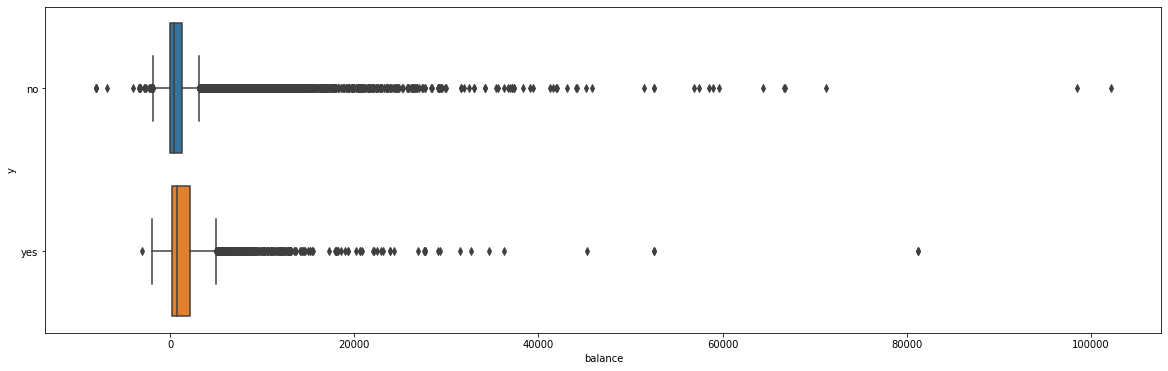

In [31]:
fig = plt.subplots(figsize = (20, 6))
sns.boxplot(x = 'balance', y = 'y', data = df)

Клієнти з депозитами рідше мають великі суми на рахунку.

Проаналізуємо розподіл кількості звінків в різних групах

<AxesSubplot:xlabel='campaign', ylabel='y'>

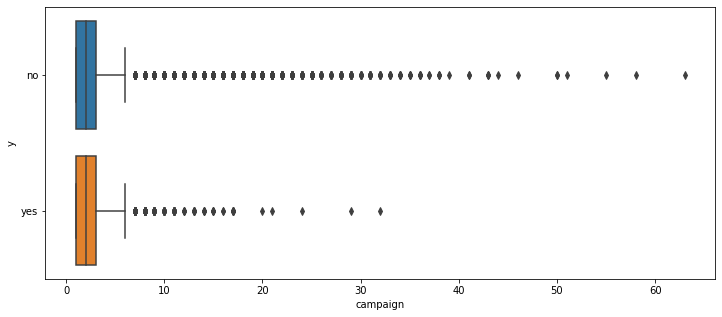

In [45]:
fig = plt.subplots(figsize = (12,5))
sns.boxplot(data = df, y = 'y', x= 'campaign')

Клієнтам без депозитів частіше телефонують в рекламних цілях

Поглянемо на розподіли балансу в групах, які мають та не мають будинку, та в групах з різним сімейним положенням

<AxesSubplot:xlabel='balance', ylabel='housing'>

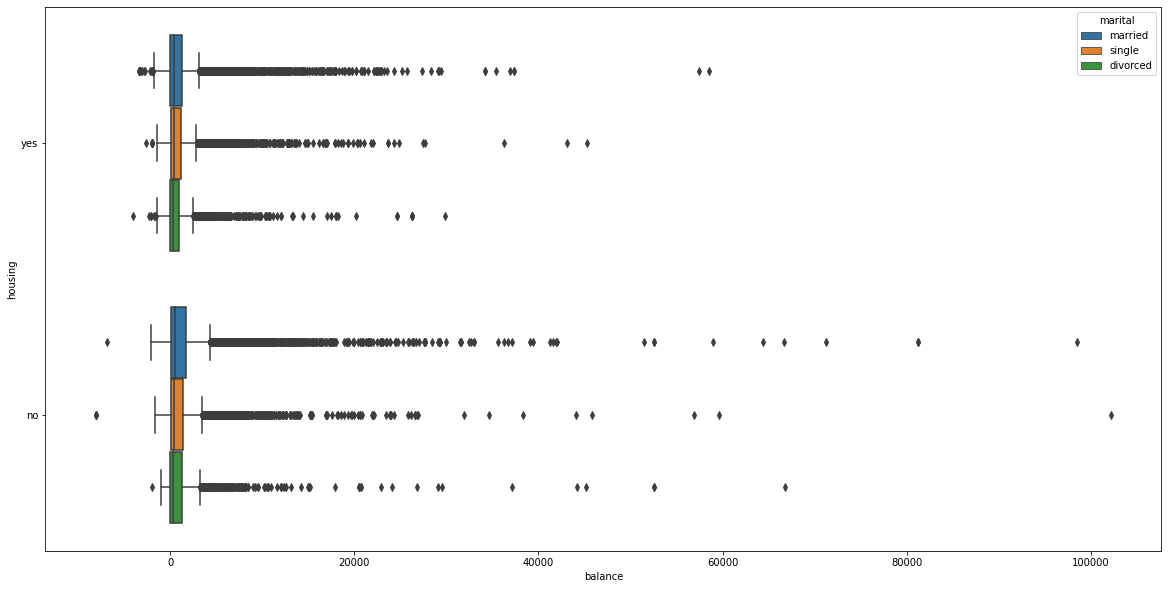

In [38]:
fig = plt.subplots(figsize = (20, 10))
sns.boxplot(data = df, x = 'balance', y = 'housing', hue = 'marital')

Як бачимо, люди, які володіють будинком мають менше високих значень балансу. Також варто відмітити менший баланс серед одиноких людей та одружених.

Ознаки в даних не мають сильної кореляції

<AxesSubplot:>

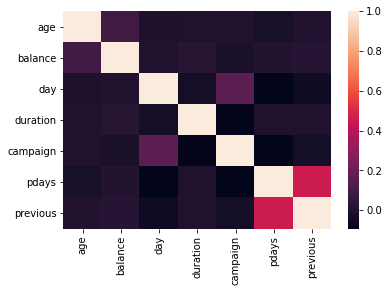

In [11]:
sns.heatmap(df.corr())

Візуалізуємо взаємні розподіли ознак з цілю перевірити, чи є ознаки, по яких можна чітко вказати на відмінність в групах

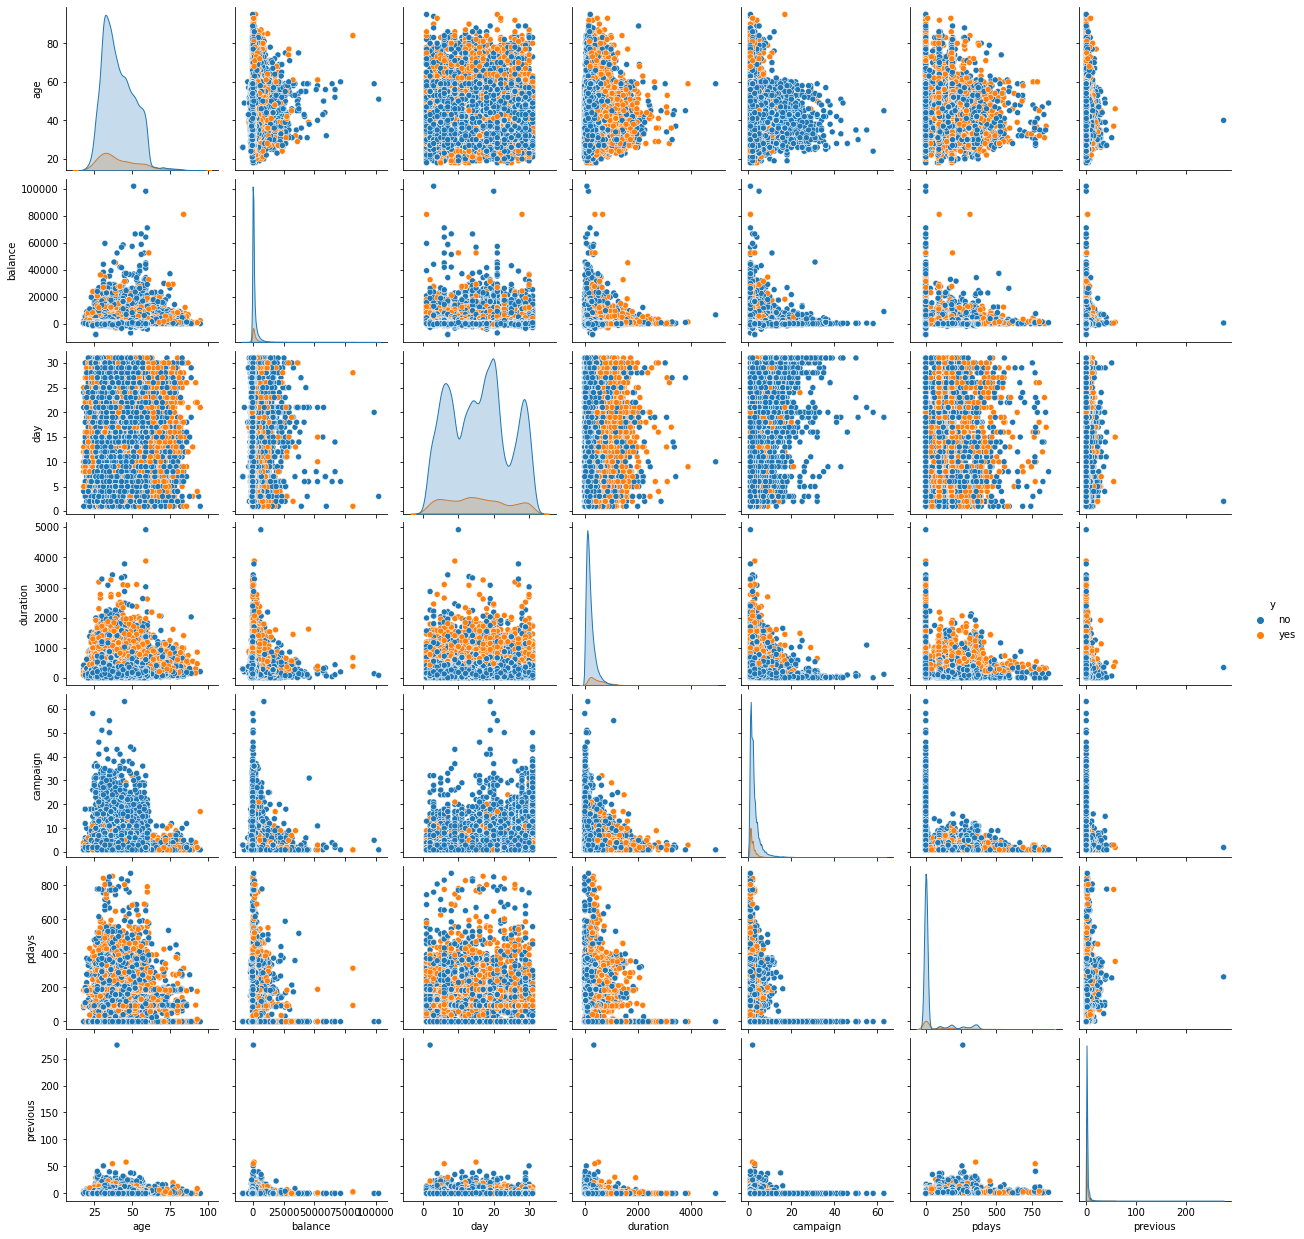

In [49]:
sns.pairplot(df, hue = 'y')

Чітких ліній поділу немає, але на багатьох графіках присутні скупчення ознак одного класу, які можуть допомогти класифікувати об'єкт при переході до вищих розмірностей.

# 3. Робота з ознаками та відбір параметрів

Знайдемо ознаки, які мають менше 10 унікаьних значень та подивимося на їхню збалансованість

In [5]:
for i in df.columns:
    if len(df[i].unique()) < 10:
        print(df[i].unique())

['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['unknown' 'failure' 'other' 'success']
['no' 'yes']


In [6]:
for i in df.columns:
    if len(df[i].unique()) < 10:
        print(i + ' ' + str(pd.value_counts(df[i], normalize= True)))

marital married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64
education secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64
default no     0.981973
yes    0.018027
Name: default, dtype: float64
housing yes    0.555838
no     0.444162
Name: housing, dtype: float64
loan no     0.839774
yes    0.160226
Name: loan, dtype: float64
contact cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64
poutcome unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64
y no     0.883015
yes    0.116985
Name: y, dtype: float64


Такий параметр як дефолт(неможливість сплати боргів, може бути вирішальним фактором для наявності депозиту) є сильно дизбалансним, і деякі моделі можуть його просто ігнорувати. Тому доречно згенерувати нові об'єкти, які не могли сплачувати борги.

In [7]:
pd.pivot_table(df, values = 'job', index = 'y', columns = 'default',aggfunc = 'count')

default,no,yes
y,,
no,39159,763
yes,5237,52


In [10]:
N_adding = 1500

for i in range(N_adding):
    df.loc[len(df) + i] = df[df['default'] == 'yes'].iloc[random.randint(1, len(df[df['default'] == 'yes']) - 1)]

Замінимо ['no', 'yes'] на [0, 1] та перетворимо інші текстові об'єкти в числові

In [49]:
df = df.replace(['no', 'yes'], [0, 1])
df = pd.get_dummies(df)

Видалимо найменш впливові ознаки методом опорних векторів з лінійним ядром. Будемо виконувати м'ягке розділення

In [61]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC


In [80]:
selector = SelectFromModel(estimator=LinearSVC(C=0.015, penalty="l1", dual=False)).fit(df.drop(columns = 'y'), df.y)
df_new = selector.transform(df.drop(columns = 'y'))

In [81]:
pd.DataFrame(df_new).head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,58,1,0,5,261,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,1,0,5,151,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,1,1,5,76,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1,0,5,92,1,-1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,33,0,0,5,198,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


Видалено близько 15 неважливих ознак

# 4. Побудова моделей

Перевіримо, які моделі найкраще працюють на наших даних

# 4.1 Пошук оптимальних моделей

Підключення бібліотек машинного навчання та створення тестової та тренувальної вибірок

In [245]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

In [83]:
X = df_new
y = df.y

In [93]:
test_size= 0.33
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=test_size, random_state=42)

Для визначення найкращої моделі використаємо K-Fold крос-валідацію та знайдемо середня значення точності моделі

In [87]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('KN', KNeighborsClassifier()))
models.append(('TR', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))


In [100]:
def ModelComparison(models, names, results):
        
    for name, model in models:

        
        kfold = KFold(n_splits=6, random_state = 42, shuffle = True)
        cv = cross_val_score(model, X_train, y_train, cv = kfold, scoring='accuracy')
        
        results.append(cv)
        names.append(name)
        
        print(f'Модель: {name}, результат: {np.mean(cv)}')

names = []
results = []
ModelComparison(models, names, results)

Модель: LR, результат: 0.8988049591002044
Модель: KN, результат: 0.888420245398773
Модель: TR, результат: 0.8762142126789366
Модель: NB, результат: 0.873689928425358
Модель: RF, результат: 0.9090299079754601


Випадковий ліс та логістична регресія показують найкращу точність. Для більш точної оцінки візуалізуємо розподіл точності моделей

<AxesSubplot:>

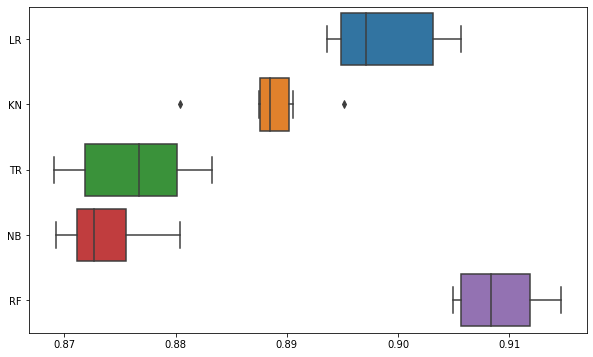

In [126]:
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(data = results, orient = 'horizontal')

Метод найближчого сусіда прогнозовано має маленьку десперсію точності, але менше значення точності ніж випадковий ліс та логістична регресія.


Побудуємо ROC криву

In [143]:
KN = KNeighborsClassifier().fit(X_train, y_train)


In [196]:
LR = LogisticRegression().fit(X_train, y_train)

In [193]:
RF = RandomForestClassifier().fit(X_train, y_train)

In [194]:
DT = DecisionTreeClassifier().fit(X_train, y_train)

In [195]:
NB = GaussianNB().fit(X_train, y_train)

In [197]:
pre_KN = KN.predict_proba(X_test)


In [198]:
pre_LR = LR.predict_proba(X_test)

In [199]:
pre_RF = RF.predict_proba(X_test)

In [200]:
pre_DT = DT.predict_proba(X_test)

In [201]:
pre_NB = NB.predict_proba(X_test)

In [240]:
pre = [pre_KN, pre_LR, pre_RF, pre_DT, pre_NB]
names = ['KN', "LR", 'RF', 'DT', 'NB']

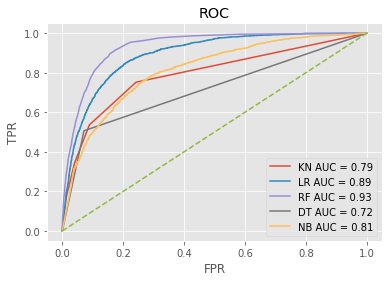

In [244]:
w = []
for prediction in pre:
    q = []
    
    for i in range(0, len(prediction)):
        q.append(prediction[i][1])
    
    w.append(q)
    
for prob in w: 
    name = names[w.index(prob)]
    fpr, tpr, _ = roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label = f'{name} AUC = {round(roc_auc, 2)}')
    
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.plot([0, 1], [0, 1], '--')

Random Forest та логістична регресія мають найбільшу площу під кривою

# 4.2 Random Forest

In [257]:
RF = RandomForestClassifier(n_estimators=500,  max_depth=20,
                            min_samples_split=2, min_samples_leaf=3).fit(X_train, y_train)
pre_RF = RF.predict(X_test)
print(accuracy_score(y_test, pre_RF))

0.9071683425235161


# 4.3 XGBoost

Також варто перевірити точність моделі XGBoost

In [258]:
from xgboost import XGBClassifier

In [280]:
XG = XGBClassifier( colsample_bytree=1,
       gamma=0.1, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0.011, reg_lambda=0.01,
       scale_pos_weight=1, seed=0, silent=True, subsample=1).fit(X_train, y_train, )
pre_XG = XG.predict(X_test)
print(accuracy_score(y_test, pre_XG))

[00:01:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:01:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9089198832306196


Вау! XGBoost має кращу точність за RandomForest.

# 4.4 Логістична регресія

In [281]:
LR = LogisticRegression().fit(X_train, y_train)
pre_LR = LR.predict(X_test)
print(accuracy_score(y_test, pre_LR))

0.8969834576710995


# 4.5 Усереднена модель

Побудуємо модель, яка приймає рішення на основі передбачення більшості моделей.

In [310]:
def AvModel(models, data):
    z = []
    for model in models:
        
        
        if str(type(model)) == "<class 'xgboost.sklearn.XGBClassifier'>":
                
            z.append(model.predict(np.array([data.values])))
            
        else:
            z.append(model.predict([data]))
    
    if z.count(1) >= 2:
        
        return 1
    
    else:
        return 0

In [309]:
XG.predict(np.array([pd.DataFrame(X_train).iloc[1].values]))

array([0], dtype=int64)

In [315]:
X = X_test
q = []
for i in range(len(X)):
    
    q.append(AvModel([LG, XG, RF] , pd.DataFrame(X).iloc[i]))

In [ ]:
print(accuracy_score(y_test, q))

Усереднена модель показує гіршу точність